# 目的
写真から表を切り出す

## 手順
①グレー画像にする

②エッジ検出（Canny法？、他の手法も模索）

③膨張処理

④輪郭検出→最も面積の大きいものを選択

⑤角度補正

⑥輪郭検出→日にちごとの枠を検出する

ヒント

テンプレートマッチング

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

# 元画像

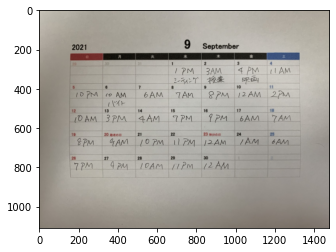

In [2]:
img = cv2.imread('/content/drive/MyDrive/DS入門講座/data/test/前処理　テスト/raw/test_calendar.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## グレースケール

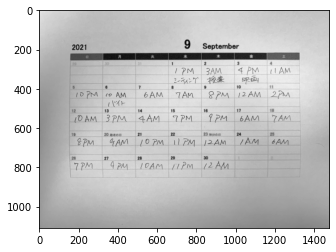

In [3]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img)
plt.gray()

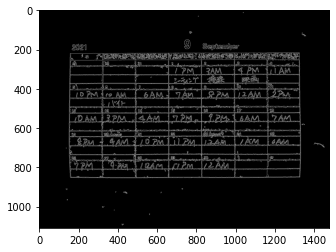

In [42]:
threshold1 = 10
threshold2 = 70
img_edges = cv2.Canny(gray_img, threshold1, threshold2)
plt.imshow(img_edges)

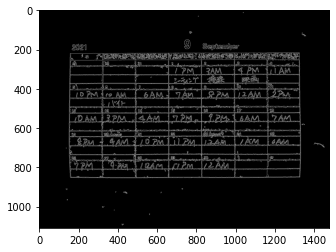

In [43]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilates = cv2.dilate(img_edges, kernel)
plt.imshow(img_edges)

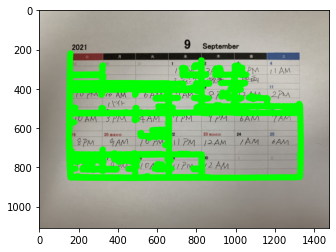

In [44]:
contours, _ = cv2.findContours(img_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# 面積最大のものを選択
card_cnt = max(contours, key=cv2.contourArea)

# 画像に輪郭を描画
line_color = (0, 255, 0)
thickness = 30
cv2.drawContours(img, [card_cnt], -1, line_color, thickness)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))